In [1]:
from google.colab import drive
mp = '/gdrive'
drive.mount(mp, force_remount=True)

Mounted at /gdrive


In [2]:
from keras.datasets import  mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

np.random.seed(121)
tf.random.set_seed(121)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,) [7 2]


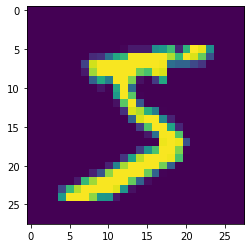

5


In [3]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape) #(60000, 28, 28) --> 6만장의 28X28
print(X_test.shape, y_test.shape, y_test[:2])

plt.imshow(X_train[0]) #문제
plt.show()

print(y_train[0]) #답안

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['mse'],    label='mse')
    plt.plot(hist['epoch'], hist['val_mse'],label = 'val_mse')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'val_loss')
    plt.legend()
    plt.show()

In [6]:
# X_train() (60000, 28, 28) --> 60000 * 784 => 784모양으로 바꿔야 input에 들어가진다.
#print(X_train[0]) #0~256개의 픽셀이 있다 => 스케일링 할 때 255으로 나누면(0부터 시작이니까 255) 0~1사이가 된다.
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')/255

# X_test (10000, 28, 28) --> 10000 * 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

In [7]:
model = Sequential()
model.add(Dense(64, input_dim=28*28, activation='relu')) #28*28=784
model.add(Dense(32, activation='relu')) #dense 개수는 자율
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax')) #0~9까지 출력해달라
print(model.summary()) #total params : 53,018

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer="adam",   #GD(경사하강) SGD momentum ada.. adam
              loss='sparse_categorical_crossentropy', #손실함수 cost loss
              metrics=["accuracy"])

In [9]:
history = model.fit(X_train,y_train,
          epochs = 100,
          batch_size=300,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

print('acc: {:.4f}, loss: {:.4f}'.format(model.evaluate(X_test, y_test)[1], model.evaluate(X_test, y_test)[0]))

Epoch 1/100
200/200 [==============================] - 2s 6ms/step - loss: 1.2823 - accuracy: 0.5973 - val_loss: 0.2610 - val_accuracy: 0.9219
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2477 - accuracy: 0.9285 - val_loss: 0.1852 - val_accuracy: 0.9451
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1785 - accuracy: 0.9483 - val_loss: 0.1558 - val_accuracy: 0.9554
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1438 - accuracy: 0.9588 - val_loss: 0.1408 - val_accuracy: 0.9590
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1213 - accuracy: 0.9644 - val_loss: 0.1274 - val_accuracy: 0.9635
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1027 - accuracy: 0.9703 - val_loss: 0.1175 - val_accuracy: 0.9648
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.0904 - accuracy: 0.9741 - val_loss: 0.1114 - val_accuracy: 0.9687